### COLLIMATION CHECK

Compatible data: final_data/20250630/Collimation Check

RESULT: Mirror system seems to be causing the beam to diverge.

z = 35 mm, Width_x = 3.794 mm, Width_y = 4.078 mm
z = 65 mm, Width_x = 3.929 mm, Width_y = 4.230 mm
z = 95 mm, Width_x = 4.010 mm, Width_y = 4.315 mm
z = 125 mm, Width_x = 4.078 mm, Width_y = 4.406 mm
z = 155 mm, Width_x = 4.160 mm, Width_y = 4.493 mm
z = 185 mm, Width_x = 4.235 mm, Width_y = 4.574 mm
z = 215 mm, Width_x = 4.372 mm, Width_y = 4.723 mm
z = 245 mm, Width_x = 4.444 mm, Width_y = 4.785 mm
z = 275 mm, Width_x = 4.510 mm, Width_y = 4.853 mm
z = 305 mm, Width_x = 4.578 mm, Width_y = 4.908 mm
z = 335 mm, Width_x = 4.641 mm, Width_y = 4.959 mm
z = 365 mm, Width_x = 4.693 mm, Width_y = 5.008 mm
z = 395 mm, Width_x = 4.755 mm, Width_y = 5.068 mm
z = 425 mm, Width_x = 4.825 mm, Width_y = 5.134 mm
z = 455 mm, Width_x = 4.936 mm, Width_y = 5.240 mm
Saved: /Users/asca/Documents/University/Master Thesis/code/Data/Focus Laser/20250630/Collimation Check/fig/beam_profile_ABCD_x.png


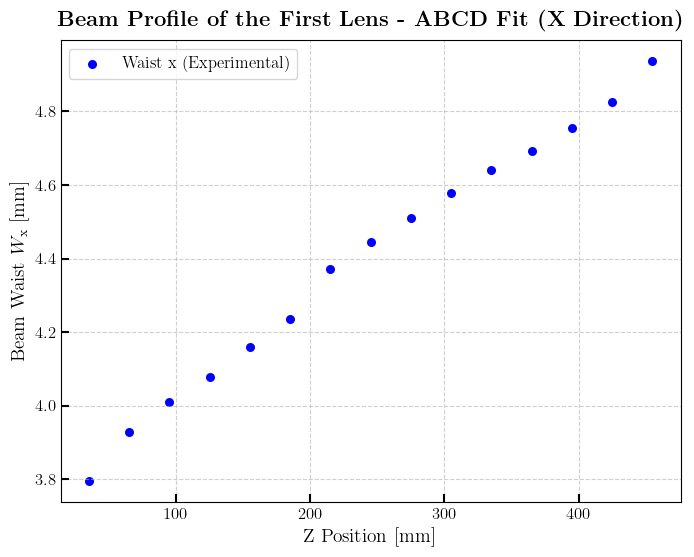

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/Focus Laser/20250630/Collimation Check/fig/beam_profile_ABCD_y.png


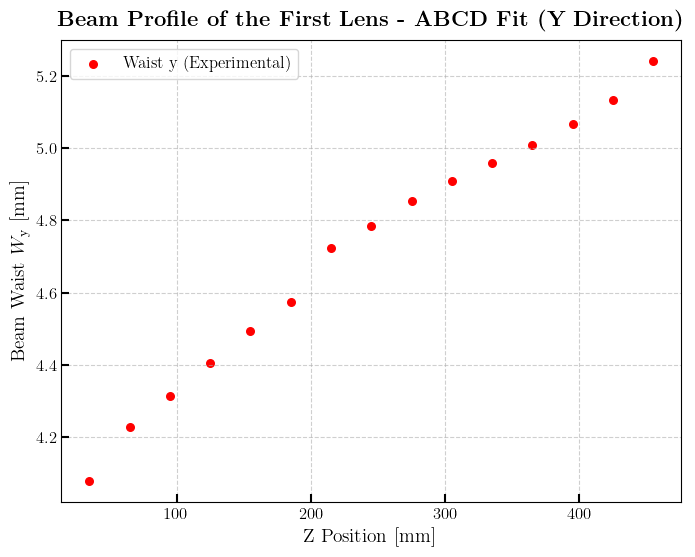

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/Focus Laser/20250630/Collimation Check"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm Beam Results.csv")) 
                    if "before lens" not in os.path.basename(f).lower()])
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract first lens data:
for file in file_list:
    filename = os.path.basename(file)
    z = int(filename.split('mm')[0])  
    z_values.append(z)

    with open(file, 'r') as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        if "Width x" in line:
            width_x.append(float(line.split()[2]))  
        if "Width y" in line:
            width_y.append(float(line.split()[2]))  

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Constants
focal_length = 498.3  # in mm
wavelength = 1.064e-3  # in mm 
z_lens2 = 300  

'''
Initial beam parameter before the lens:
Assuming the beam to be collimated but with a finite waist before the lens
Estimate the beam waist before the lens (W0_initial) and its position
The lens focuses the beam at z = 50 mm, use the lens formula for Gaussian beams
'''

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")
# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Collimation Check (X Direction)}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_ABCD_x = os.path.join(fig_dir, "collimation_check_x.png")
plt.savefig(save_beam_ABCD_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_ABCD_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Collimation Check (Y Direction)}', fontsize=16, fontweight='bold', pad=10)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_ABCD_y = os.path.join(fig_dir, "collimation_check_y.png")
plt.savefig(save_beam_ABCD_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_ABCD_y}")
plt.show()

### BEAM PROFILE (LB1471-C)

Lens (plano-convex): LB1471-C, F = 50.0mm, BFL = 48.2

Compatible data (.csv files) from camera (CMOS-1/001 Nano, Sensor Active area (mm²): 11.3 x 11.3): final_data/20250630/LB1471-C

Reference for the equation of the focused spot size in the Convergence Test: "Lasers" by A. E. Seigmann (pg. 676).

Found beam width before the lens: Width x = 5.777 mm, Width y = 5.033 mm
z = 13 mm, Width_x = 3.168 mm, Width_y = 3.451 mm
z = 17 mm, Width_x = 2.615 mm, Width_y = 2.850 mm
z = 27 mm, Width_x = 1.519 mm, Width_y = 1.654 mm
z = 37 mm, Width_x = 0.460 mm, Width_y = 0.503 mm
z = 43 mm, Width_x = 0.283 mm, Width_y = 0.293 mm
z = 50 mm, Width_x = 0.882 mm, Width_y = 0.959 mm
z = 53 mm, Width_x = 1.293 mm, Width_y = 1.390 mm
z = 58 mm, Width_x = 1.681 mm, Width_y = 1.843 mm
z = 68 mm, Width_x = 2.808 mm, Width_y = 3.067 mm
z = 78 mm, Width_x = 3.988 mm, Width_y = 4.288 mm
z = 88 mm, Width_x = 4.679 mm, Width_y = 5.286 mm
z = 98 mm, Width_x = 5.795 mm, Width_y = 6.476 mm
z = 108 mm, Width_x = 7.022 mm, Width_y = 7.137 mm
z = 118 mm, Width_x = 7.728 mm, Width_y = 7.460 mm
z = 128 mm, Width_x = 7.884 mm, Width_y = 7.570 mm
z = 138 mm, Width_x = 7.868 mm, Width_y = 7.704 mm
z = 148 mm, Width_x = 7.846 mm, Width_y = 8.143 mm
z = 158 mm, Width_x = 7.955 mm, Width_y = 8.388 mm
z = 168 mm, Width_x =

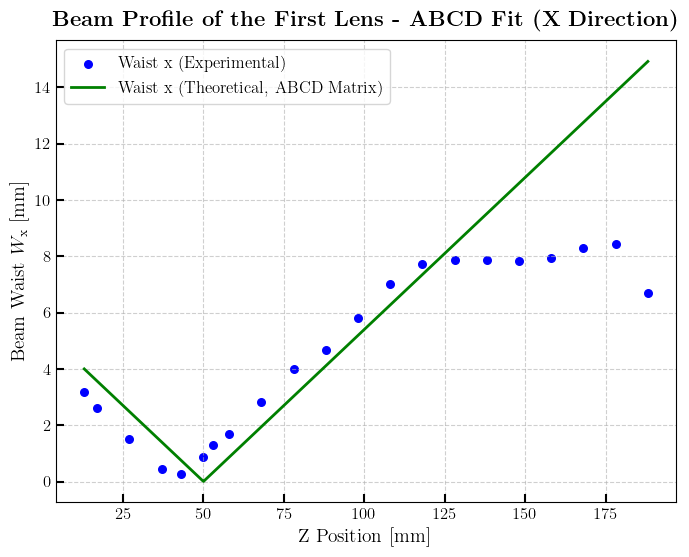

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/Focus Laser/20250630/LB1471-C/fig/beam_profile_ABCD_y.png


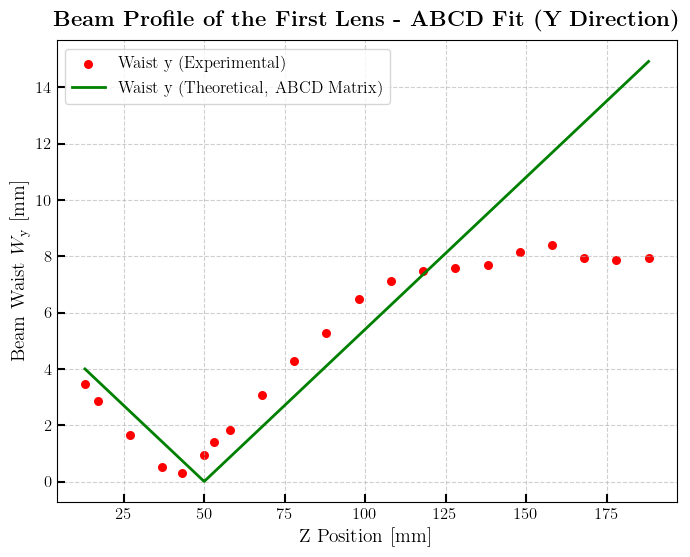

In [10]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/Focus Laser/20250630/LB1471-C"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm Beam Results.csv")) 
                    if "before lens" not in os.path.basename(f).lower()])
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract first lens data:
for file in file_list:
    filename = os.path.basename(file)
    z = int(filename.split('mm')[0])  
    z_values.append(z)

    with open(file, 'r') as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        if "Width x" in line:
            width_x.append(float(line.split()[2]))  
        if "Width y" in line:
            width_y.append(float(line.split()[2]))  

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Constants
focal_length = 50.0  # in mm
wavelength = 1.064e-3  # in mm 
z_lens2 = 300  

'''
Initial beam parameter before the lens:
Assuming the beam to be collimated but with a finite waist before the lens
Estimate the beam waist before the lens (W0_initial) and its position
The lens focuses the beam at z = 50 mm, use the lens formula for Gaussian beams
'''

# Function to get initial beam waist from "before lens Beam Results.csv"
def get_initial_beam_waist(file_path):
    try:
        with open(file_path, 'r') as f:
            lines = f.readlines()
        width_x_initial = None
        width_y_initial = None
        found_2nd_moments = False
        
        for i, line in enumerate(lines):
            if "2nd Moments" in line:
                found_2nd_moments = True
            if found_2nd_moments and "Width x" in line:
                width_x_initial = float(line.split()[2])
            if found_2nd_moments and "Width y" in line:
                width_y_initial = float(line.split()[2])
        
        if width_x_initial is None or width_y_initial is None:
            print(f"Error: Could not find 'Width x' or 'Width y' in {file_path}. File content:")
            print("\n".join(lines))  # Print file content for debugging
            print("Using default W0_initial = 4 mm.")
            return 5.5  # Default value if data not found
        else:
            print(f"Found beam width before the lens: Width x = {width_x_initial} mm, Width y = {width_y_initial} mm")
            return (width_x_initial + width_y_initial) / 2
    except FileNotFoundError:
        print(f"Error: File {file_path} not found. Using default W0_initial = 4 mm.")
        return 5.5
    except Exception as e:
        print(f"Error reading {file_path}: {e}. Using default W0_initial = 4 mm.")
        return 5.5

# Beam waist after the lens (at focal length)
W0 = width_x.min()  # Minimum width from data
z_waist = z_values[np.argmin(width_x)]  # Position of the waist
z_R = np.pi * W0**2 / wavelength  # Rayleigh range at the waist in mm

# Read W0_initial from file
before_lens_file = os.path.join(data_path, "before lens Beam Results.csv")
W0_initial = get_initial_beam_waist(before_lens_file)  # Initial beam waist in mm (before the lens)

# Assume the first lens is at z = 0 and the beam is collimated or has a waist before the lens
z_R_initial = np.pi * W0_initial**2 / wavelength  # Rayleigh range of initial beam
q0 = 0 + 1j * z_R_initial  # Beam parameter at z = 0

# Apply the lens transformation at z = 0
A_lens = 1
B_lens = 0
C_lens = -1 / focal_length
D_lens = 1
q1 = (A_lens * q0 + B_lens) / (C_lens * q0 + D_lens)  # Beam parameter just after the lens

# Theoretical z-values for the curve
z_theoretical = np.linspace(min(z_values), max(z_values), 10000000)
W_theoretical = np.zeros_like(z_theoretical)

# Propagate the beam in free space after the lens
for i, z in enumerate(z_theoretical):
    # ABCD matrix for free space propagation
    A_free = 1
    B_free = z
    C_free = 0
    D_free = 1
    # Transform the beam parameter
    q_new = (A_free * q1 + B_free) / (C_free * q1 + D_free)
    inv_q_new = 1 / q_new
    # Beam width from the imaginary part of 1/q_new
    # Ensure the imaginary part is negative (as expected for a Gaussian beam)
    if inv_q_new.imag < 0:
        W_theoretical[i] = np.sqrt(-wavelength / (np.pi * inv_q_new.imag))
    else:
        W_theoretical[i] = np.nan 

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000
min_waist_theo = min(W_theoretical) * 1000
max_waist_theo = max(W_theoretical) 
    
print("\nBEAM WAIST SUMMARY")
print(f"Experimental (Lens 1):")
print(f"  Min Waist X: {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y:.2f} μm")
print(f"Theoretical (After Lens 1):")
print(f"  Min Waist: {min_waist_theo:.2f} μm")
print(f"  Max Waist: {max_waist_theo:.2f} mm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Experimental)', marker='o', s=30)
plt.plot(z_theoretical, W_theoretical, color='g', linestyle='-', linewidth=2, label='Waist x (Theoretical, ABCD Matrix)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile of the First Lens - ABCD Fit (X Direction)}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_ABCD_x = os.path.join(fig_dir, "beam_profile_ABCD_x.png")
plt.savefig(save_beam_ABCD_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_ABCD_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Experimental)', marker='o', s=30)
plt.plot(z_theoretical, W_theoretical, color='g', linestyle='-', linewidth=2, label='Waist y (Theoretical, ABCD Matrix)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile of the First Lens - ABCD Fit (Y Direction)}', fontsize=16, fontweight='bold', pad=10)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_ABCD_y = os.path.join(fig_dir, "beam_profile_ABCD_y.png")
plt.savefig(save_beam_ABCD_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_ABCD_y}")
plt.show()

### CONVERGENCE TEST

q1 = -5.00e+01+2.90e-02j
Saved: /Users/asca/Documents/University/Master Thesis/code/Data/Focus Laser/20250324/fig/beam_waist_convergence.png


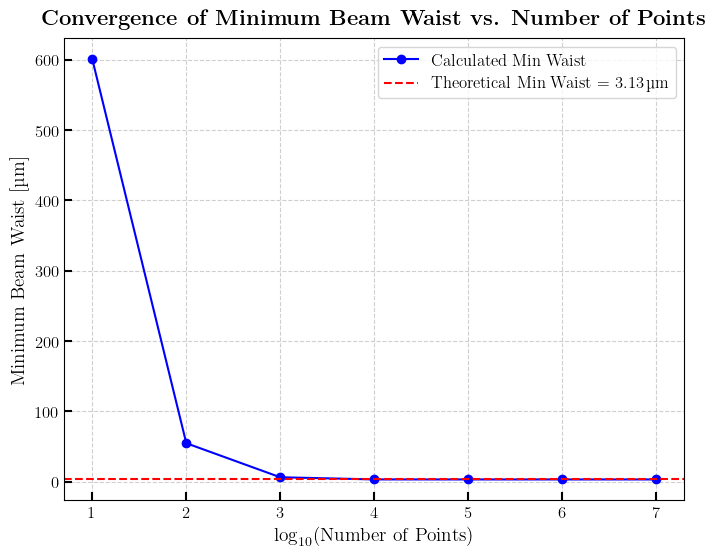


CONVERGENCE TEST SUMMARY
Theoretical Min Waist: 3.1330 μm
Points: 10, Min Waist: 600.5620 μm, Difference from Theoretical: 597.4290 μm
Points: 100, Min Waist: 54.6840 μm, Difference from Theoretical: 51.5509 μm
Points: 1000, Min Waist: 6.2505 μm, Difference from Theoretical: 3.1175 μm
Points: 10000, Min Waist: 3.1790 μm, Difference from Theoretical: 0.0460 μm
Points: 100000, Min Waist: 3.1335 μm, Difference from Theoretical: 0.0004 μm
Points: 1000000, Min Waist: 3.1330 μm, Difference from Theoretical: 0.0000 μm
Points: 10000000, Min Waist: 3.1330 μm, Difference from Theoretical: -0.0000 μm


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Ensure siunitx is available 
plt.rcParams['text.latex.preamble'] = r'\usepackage{siunitx}'

# Constants
focal_length = 50.0  # in mm
wavelength = 1.064e-3  # in mm
W0_initial = (5.777 + 5.033) / 2  # Average of Waist x and Waist y in mm
z_R_initial = np.pi * W0_initial**2 / wavelength  # Rayleigh range of initial beam
q0 = 0 + 1j * z_R_initial  # Beam parameter at z = 0

# Theoretical beam waist using equation from Seigmann
W0_theoretical = (wavelength * focal_length) / (np.pi * W0_initial)

# Apply the lens transformation at z = 0
A_lens = 1
B_lens = 0
C_lens = -1 / focal_length
D_lens = 1
q1 = (A_lens * q0 + B_lens) / (C_lens * q0 + D_lens)  # Beam parameter just after the lens
print(f"q1 = {q1:.2e}")

# Number of points to test 
n_points_list = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
min_waists = []

# Propagation range
z_min = 0
z_max = focal_length * 2

# Convergence test
for n_points in n_points_list:
    z_theoretical = np.linspace(z_min, z_max, n_points)
    W_theoretical = np.zeros_like(z_theoretical)
    
    for i, z in enumerate(z_theoretical):
        A_free = 1
        B_free = z
        C_free = 0
        D_free = 1
        q_new = (A_free * q1 + B_free) / (C_free * q1 + D_free)
        inv_q_new = 1 / q_new
        if inv_q_new.imag < 0:  # tolerance
            W_theoretical[i] = np.sqrt(-wavelength / (np.pi * inv_q_new.imag))
        else:
            W_theoretical[i] = np.nan
            print(f"n_points = {n_points}, z = {z:.2f}, q_new = {q_new:.2e}, inv_q_new.imag = {inv_q_new.imag:.2e}")
    
    if np.all(np.isnan(W_theoretical)):
        print(f"Error: All W_theoretical values are NaN for n_points = {n_points}")
        min_waists.append(np.nan)
    else:
        min_waist = np.min(W_theoretical[~np.isnan(W_theoretical)])
        min_waists.append(min_waist)

# Convert to μm for plotting
min_waists = np.array(min_waists) * 1000
W0_theoretical_um = W0_theoretical * 1000
log_n_points = np.log10(n_points_list)

# Plotting 
plt.figure(figsize=(8, 6))
plt.plot(log_n_points, min_waists, marker='o', linestyle='-', color='b', label=r'Calculated Min Waist')
plt.axhline(y=W0_theoretical_um, color='r', linestyle='--', label=r'Theoretical Min Waist = \SI{' + f'{W0_theoretical_um:.2f}' + r'}{\micro\meter}')
plt.xlabel(r'$\log_{10}$(Number of Points)', fontsize=14)
plt.ylabel(r'Minimum Beam Waist [\si{\micro\meter}]', fontsize=14)
plt.title(r'\textbf{Convergence of Minimum Beam Waist vs. Number of Points}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper right', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)

# Save the plot
fig_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/Focus Laser/20250324/fig"
os.makedirs(fig_dir, exist_ok=True)
save_path = os.path.join(fig_dir, "beam_waist_convergence.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_path}")
plt.show()

# Print summary
print("\nCONVERGENCE TEST SUMMARY")
print(f"Theoretical Min Waist: {W0_theoretical_um:.4f} μm")
for n, w in zip(n_points_list, min_waists):
    print(f"Points: {n}, Min Waist: {w:.4f} μm, Difference from Theoretical: {(w - W0_theoretical_um):.4f} μm")